In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [11]:
train['Sex_e'] = encoder.fit_transform(train['Sex'])
test['Sex_e'] = encoder.fit_transform(test['Sex'])

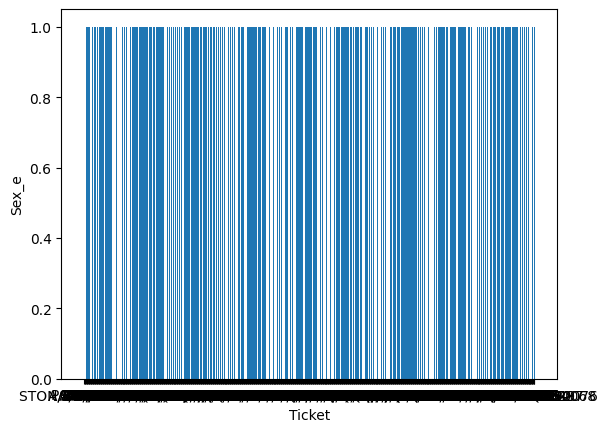

In [12]:
plt.bar(train['Ticket'], train['Sex_e'])
plt.xlabel('Ticket')
plt.ylabel('Sex_e')
plt.show()

In [13]:
train['Embarked_e'] = encoder.fit_transform(train['Embarked'])
test['Embarked_e'] = encoder.fit_transform(test['Embarked'])

In [14]:
train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Sex', 'Embarked'], inplace=True)
test_PassengerId = test['PassengerId']
test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Sex', 'Embarked'], inplace=True)

In [15]:
test

,Pclass,Age,SibSp,Parch,Fare,Sex_e,Embarked_e
0,3,34.5,0,0,7.8292,1,1
1,3,47.0,1,0,7.0000,0,2
2,2,62.0,0,0,9.6875,1,1
3,3,27.0,0,0,8.6625,1,2
4,3,22.0,1,1,12.2875,0,2
...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,1,2
414,1,39.0,0,0,108.9000,0,0
415,3,38.5,0,0,7.2500,1,2
416,3,NaN,0,0,8.0500,1,2


In [16]:
train['Age'] = train.Age.fillna(train.Age.median())
test['Age'] = test.Age.fillna(test.Age.median())

In [17]:
train.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_e         0
Embarked_e    0
dtype: int64

In [18]:
test.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          1
Sex_e         0
Embarked_e    0
dtype: int64

In [19]:
test['Fare'] = test.Fare.fillna(test.Fare.mean())

In [20]:
test.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_e         0
Embarked_e    0
dtype: int64

In [21]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_e,Embarked_e
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


In [22]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_e,Embarked_e
0,3,34.5,0,0,7.8292,1,1
1,3,47.0,1,0,7.0000,0,2
2,2,62.0,0,0,9.6875,1,1
3,3,27.0,0,0,8.6625,1,2
4,3,22.0,1,1,12.2875,0,2


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
x = train.drop('Survived', axis=1)
y = train['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=47)

In [25]:
from sklearn import tree

In [26]:
model = tree.DecisionTreeClassifier()

In [27]:
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [28]:
model.score(x_test,y_test)

0.7430167597765364

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
model = RandomForestClassifier()

In [31]:
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
model.score(x_test,y_test)

0.7653631284916201